In [ ]:
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '18px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)
print("Hey this is the font.. ")
print("ML Assignment")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hey this is the font.. 
ML Assignment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SECTION-A**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. **Read Pima Indian Diabetes Dataset from kaggle**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from google.colab import data_table
data_table.DataTable(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


2.**Shape of the dataset**

In [ ]:
print (f'Diabetes dataframe shape is : {df.shape};\nColumn Names are : {df.columns}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Diabetes dataframe shape is : (768, 9);
Column Names are : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


3.**Show the name of the columns, explain if possible in some detail**

In [ ]:
df.columns.tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Variables| Description|
--|:-- |
**PREDICTORS**|
Pregnancies  |Number of times pregnancy happened.
 Glucose | Plasma glucose concentration at 2 hours in an oral glucose tolerance test.
BloodPressure|Diastolic blood pressure (mm Hg).
SkinThickness| Triceps skin fold thickness (mm).
Insulin| 2-Hour serum insulin (mu U/ml).
 BMI| Body mass index (weight in kg/(height in m)^2).
  DiabetesPedigreeFunction| Diabetes pedigree function.
Age| Age (years).
**RESPONSE**| |
Outcome| Class variable (0 or 1).

4.**Display dataframe in a useful column order for decision makers**

In [ ]:
new_df = df.loc[:, ['Outcome','Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']]

data_table.DataTable(new_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,6,148,72,35,0,33.6,0.627,50
1,0,1,85,66,29,0,26.6,0.351,31
2,1,8,183,64,0,0,23.3,0.672,32
3,0,1,89,66,23,94,28.1,0.167,21
4,1,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...
763,0,10,101,76,48,180,32.9,0.171,63
764,0,2,122,70,27,0,36.8,0.340,27
765,0,5,121,72,23,112,26.2,0.245,30
766,1,1,126,60,0,0,30.1,0.349,47


In [ ]:
new_df.info()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


5.**Perform a basic summary of dataset features and target columns**

In [ ]:
new_df.describe().round(2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.35,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,0.48,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,0.00,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,0.00,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,1.00,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,1.00,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


In [ ]:
new_df.isnull().sum()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Outcome                     0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

6.**Plot histograms, show the mean line on histogram plot**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

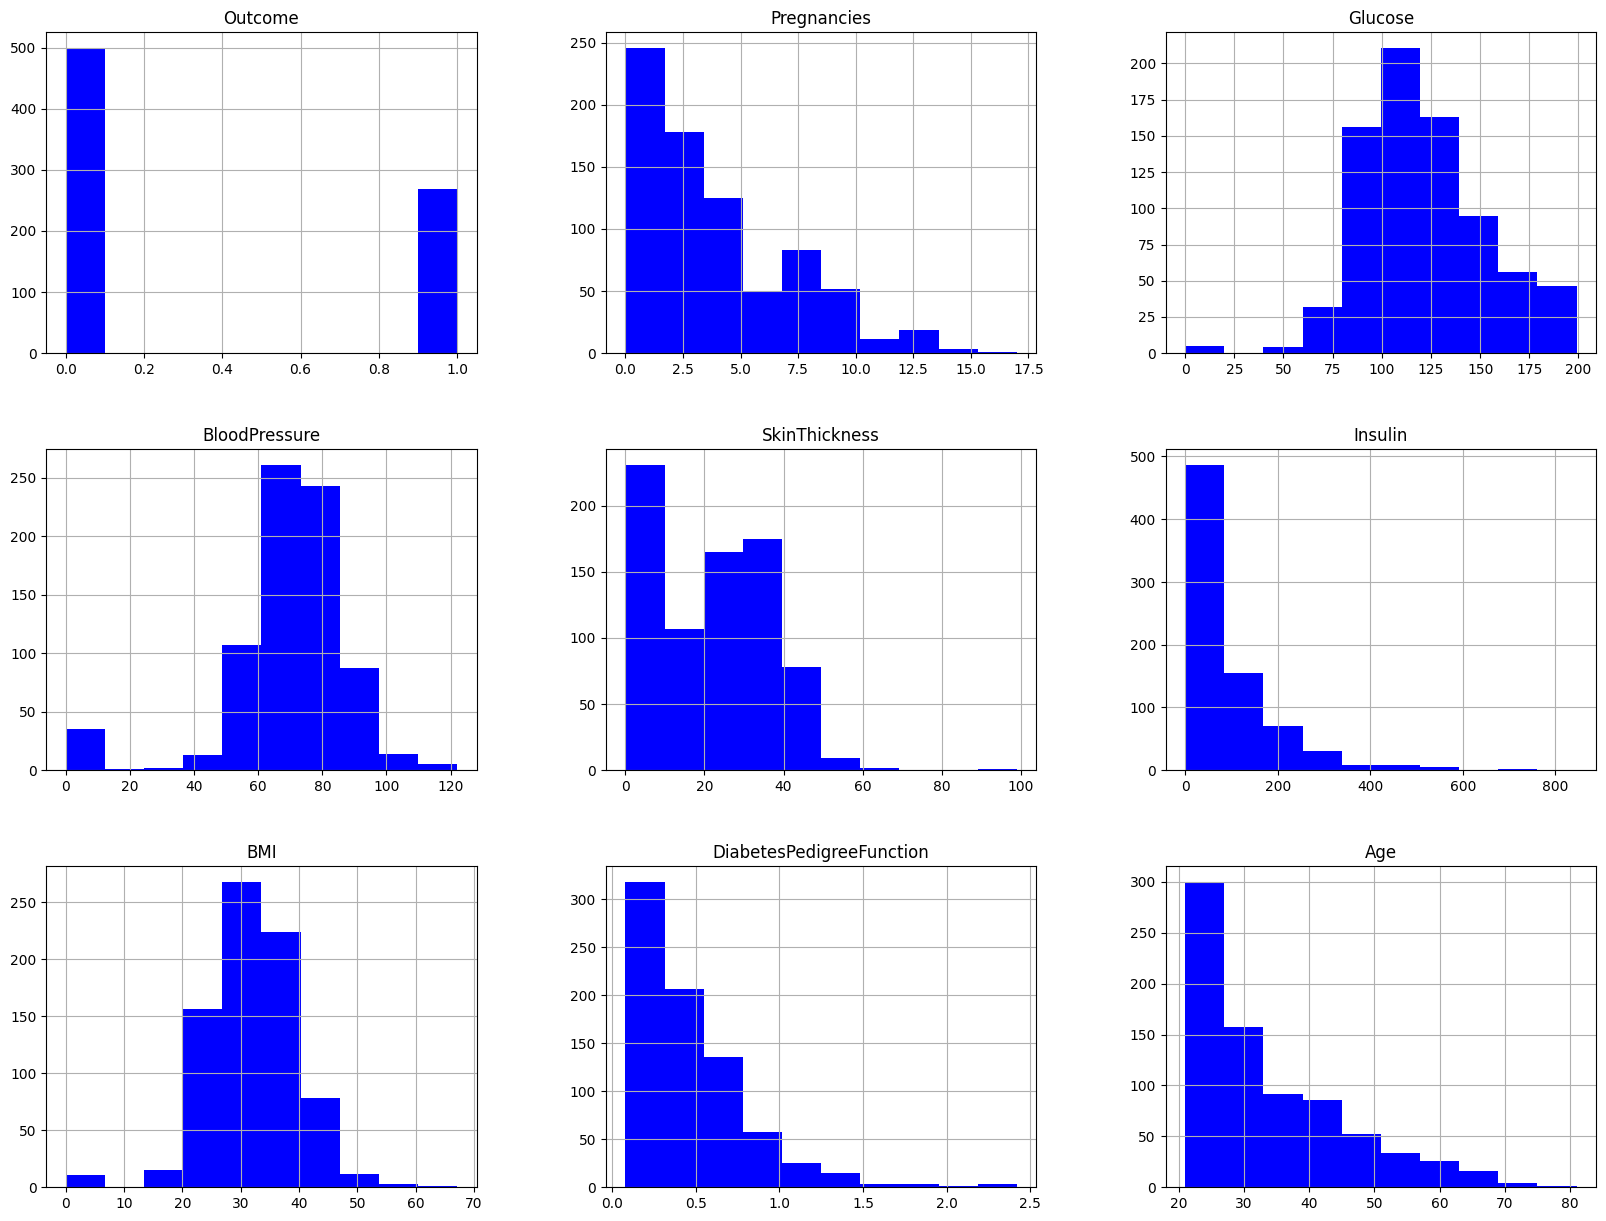

Text(0.5, 0.98, 'Broad View of Dataset')

<Figure size 2000x1500 with 0 Axes>

In [ ]:
plt.close()
plt.rcParams['figure.figsize'] = [20, 15]
new_df.hist(color='blue')
plt.show()
plt.suptitle('Broad View of Dataset')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

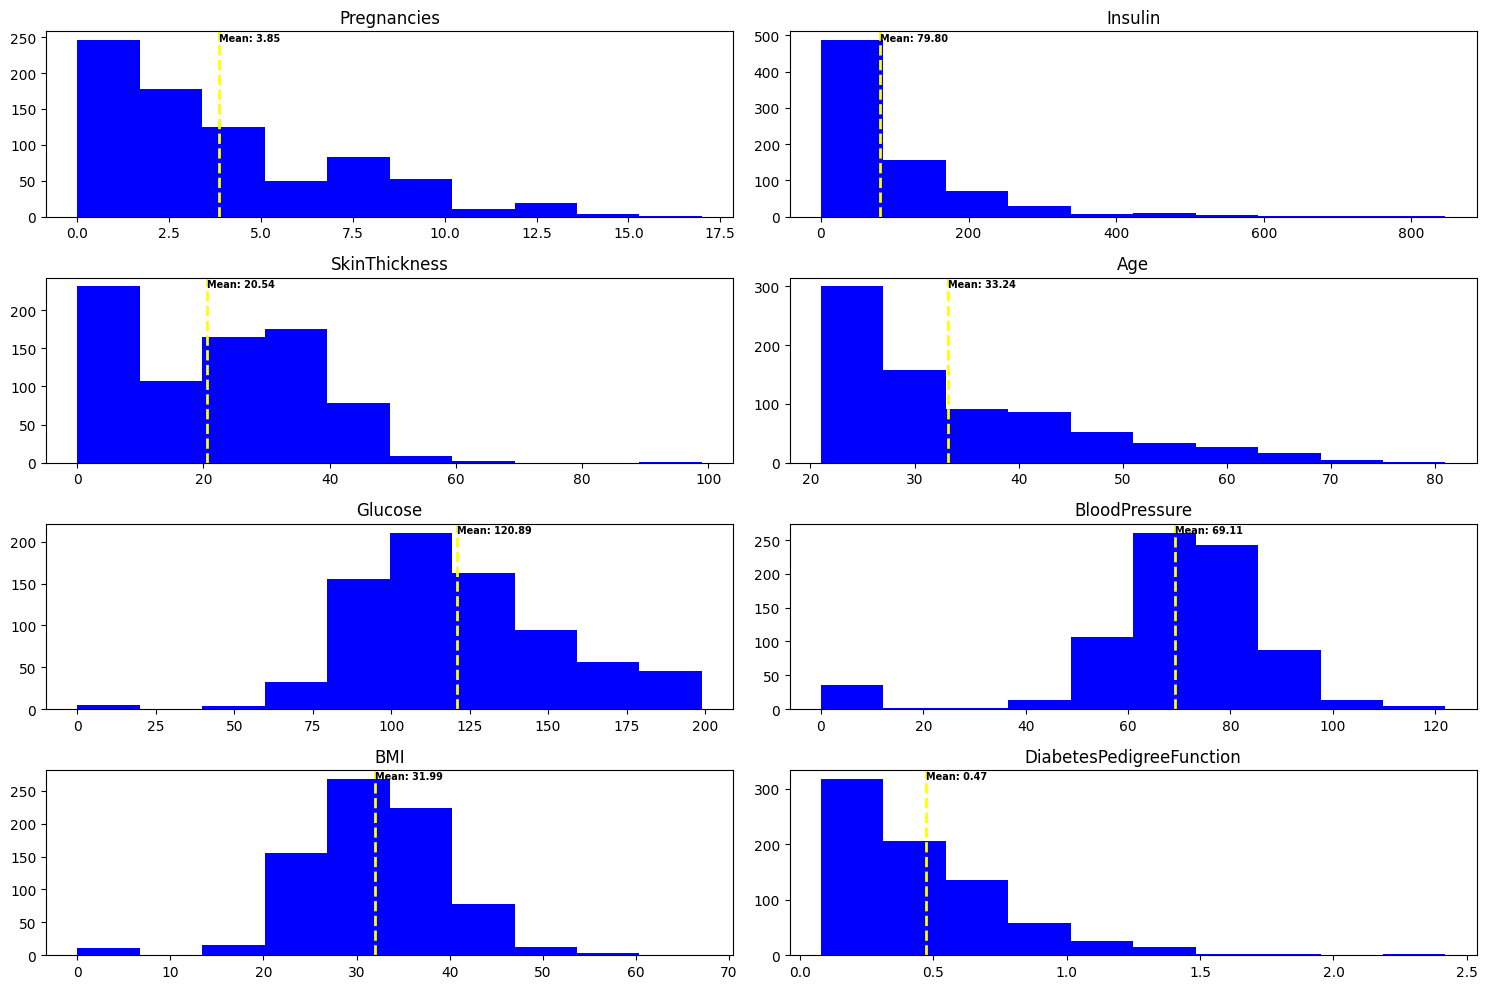

In [ ]:
col_Names = ['Pregnancies',
             'Insulin',
             'SkinThickness',
             'Age',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',]

plt.rcParams['figure.figsize'] = [15, 10]
num_plots = len(col_Names)
num_cols = 2
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols)

for i, ax in enumerate(axes.flat):
    if i < num_plots:
        ax.hist(new_df[col_Names[i]], color='blue')
        ax.axvline(new_df[col_Names[i]].mean(), color='yellow', linestyle='dashed', linewidth=2)
        ax.set_title(col_Names[i])
        ax.text(new_df[col_Names[i]].mean(), ax.get_ylim()[1] * 0.95,
                f"Mean: {new_df[col_Names[i]].mean():.2f}", fontsize=7, weight='bold')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

7.**Examine hist each for skew visually, and using scipy lib**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

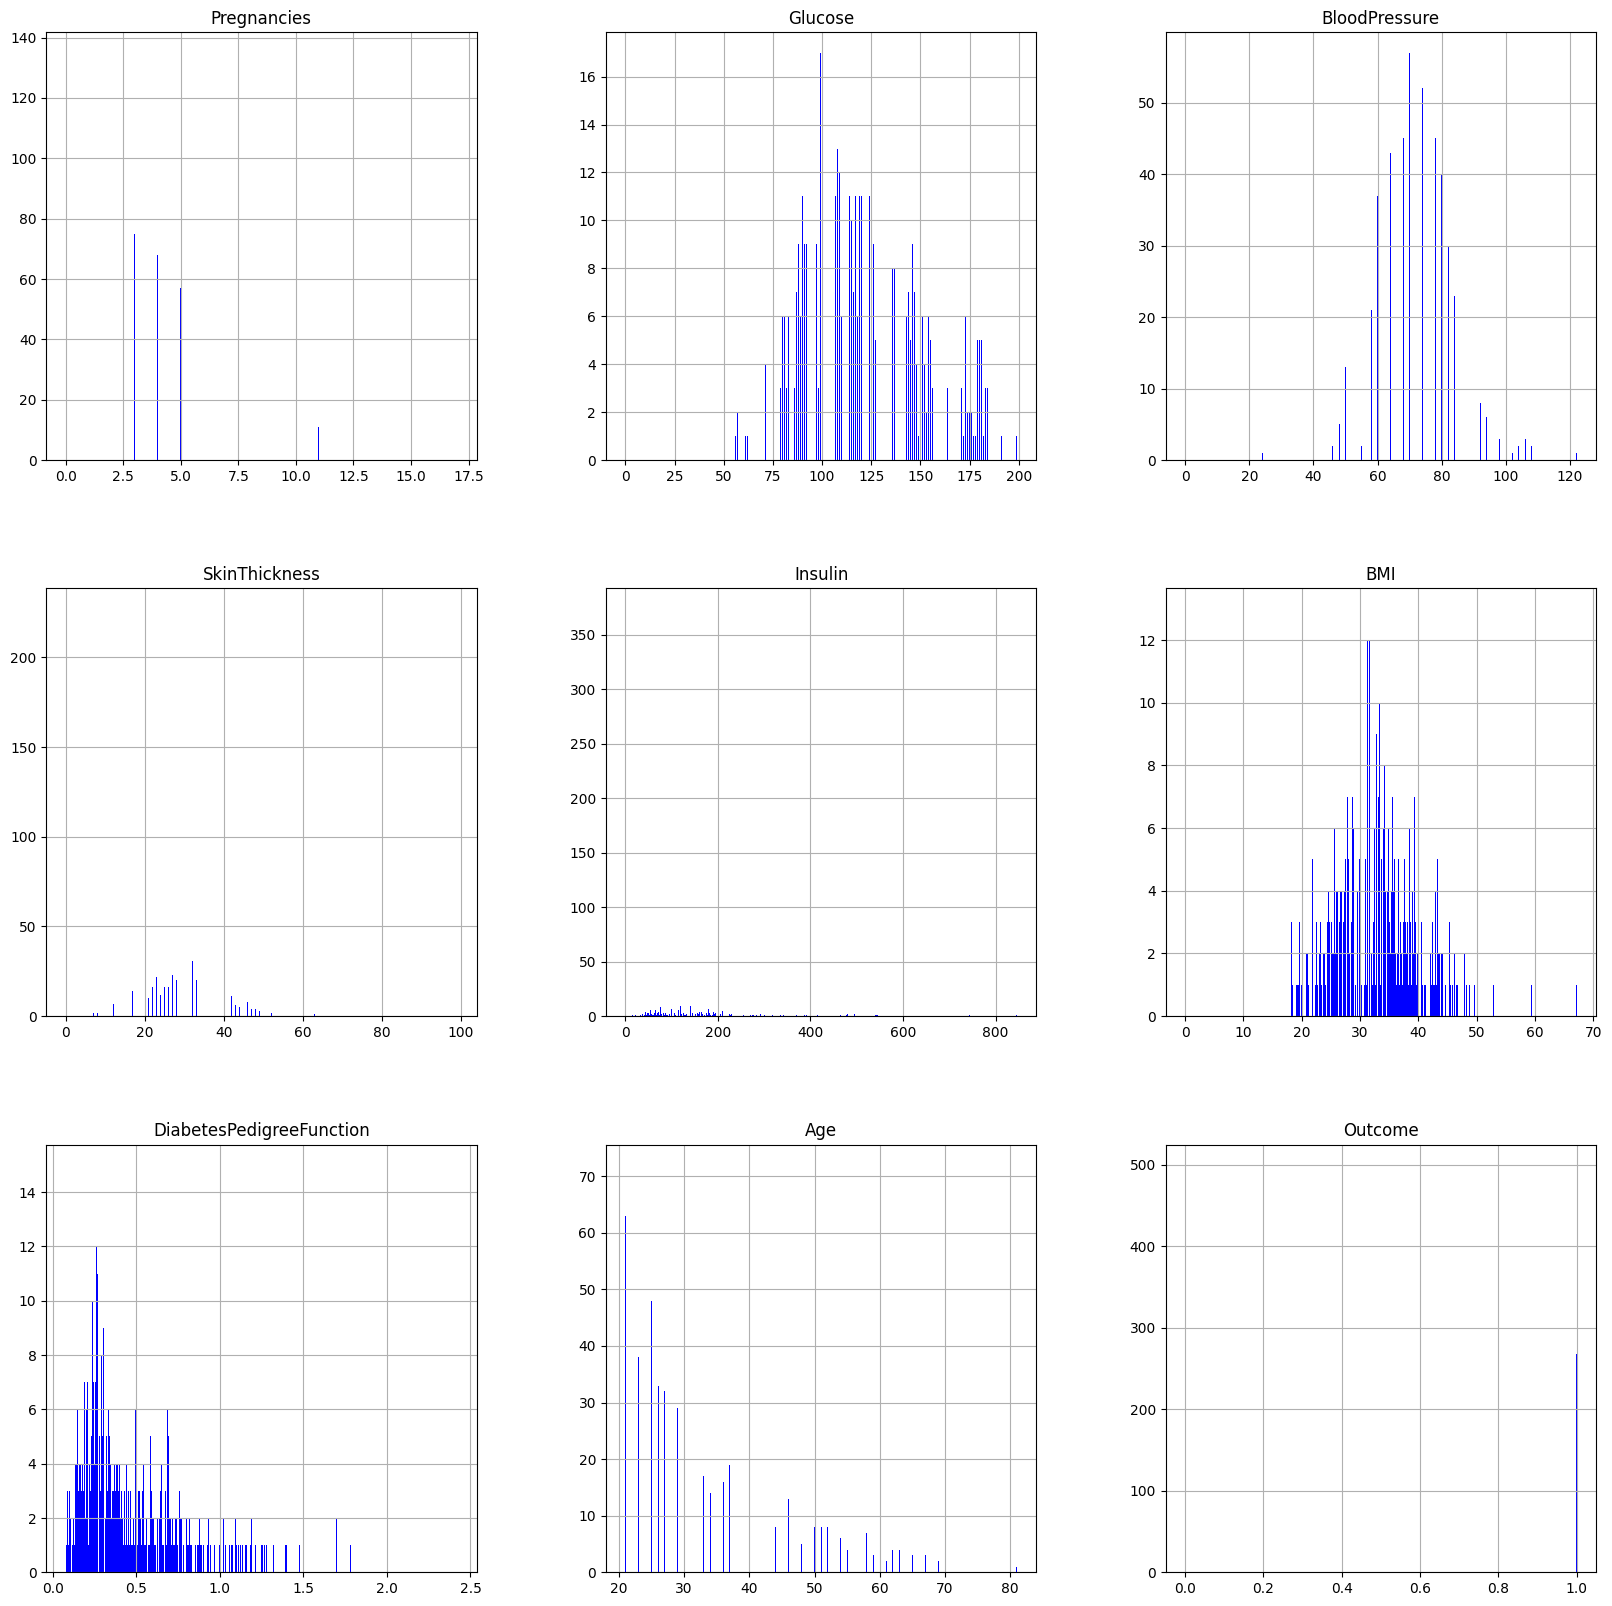

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
df.iloc[:,: ].hist(bins=df.shape[0], color='blue');

In [ ]:
skew = new_df.skew()
print("Skew of attribute distributions in the data:\n")
print(skew)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Skew of attribute distributions in the data:

Outcome                     0.635017
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64


8.**Publish those hist with skew either in title or as text in the plot. Bring out three patterns or inferences that you observed visually and backed by skewness statistics.**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

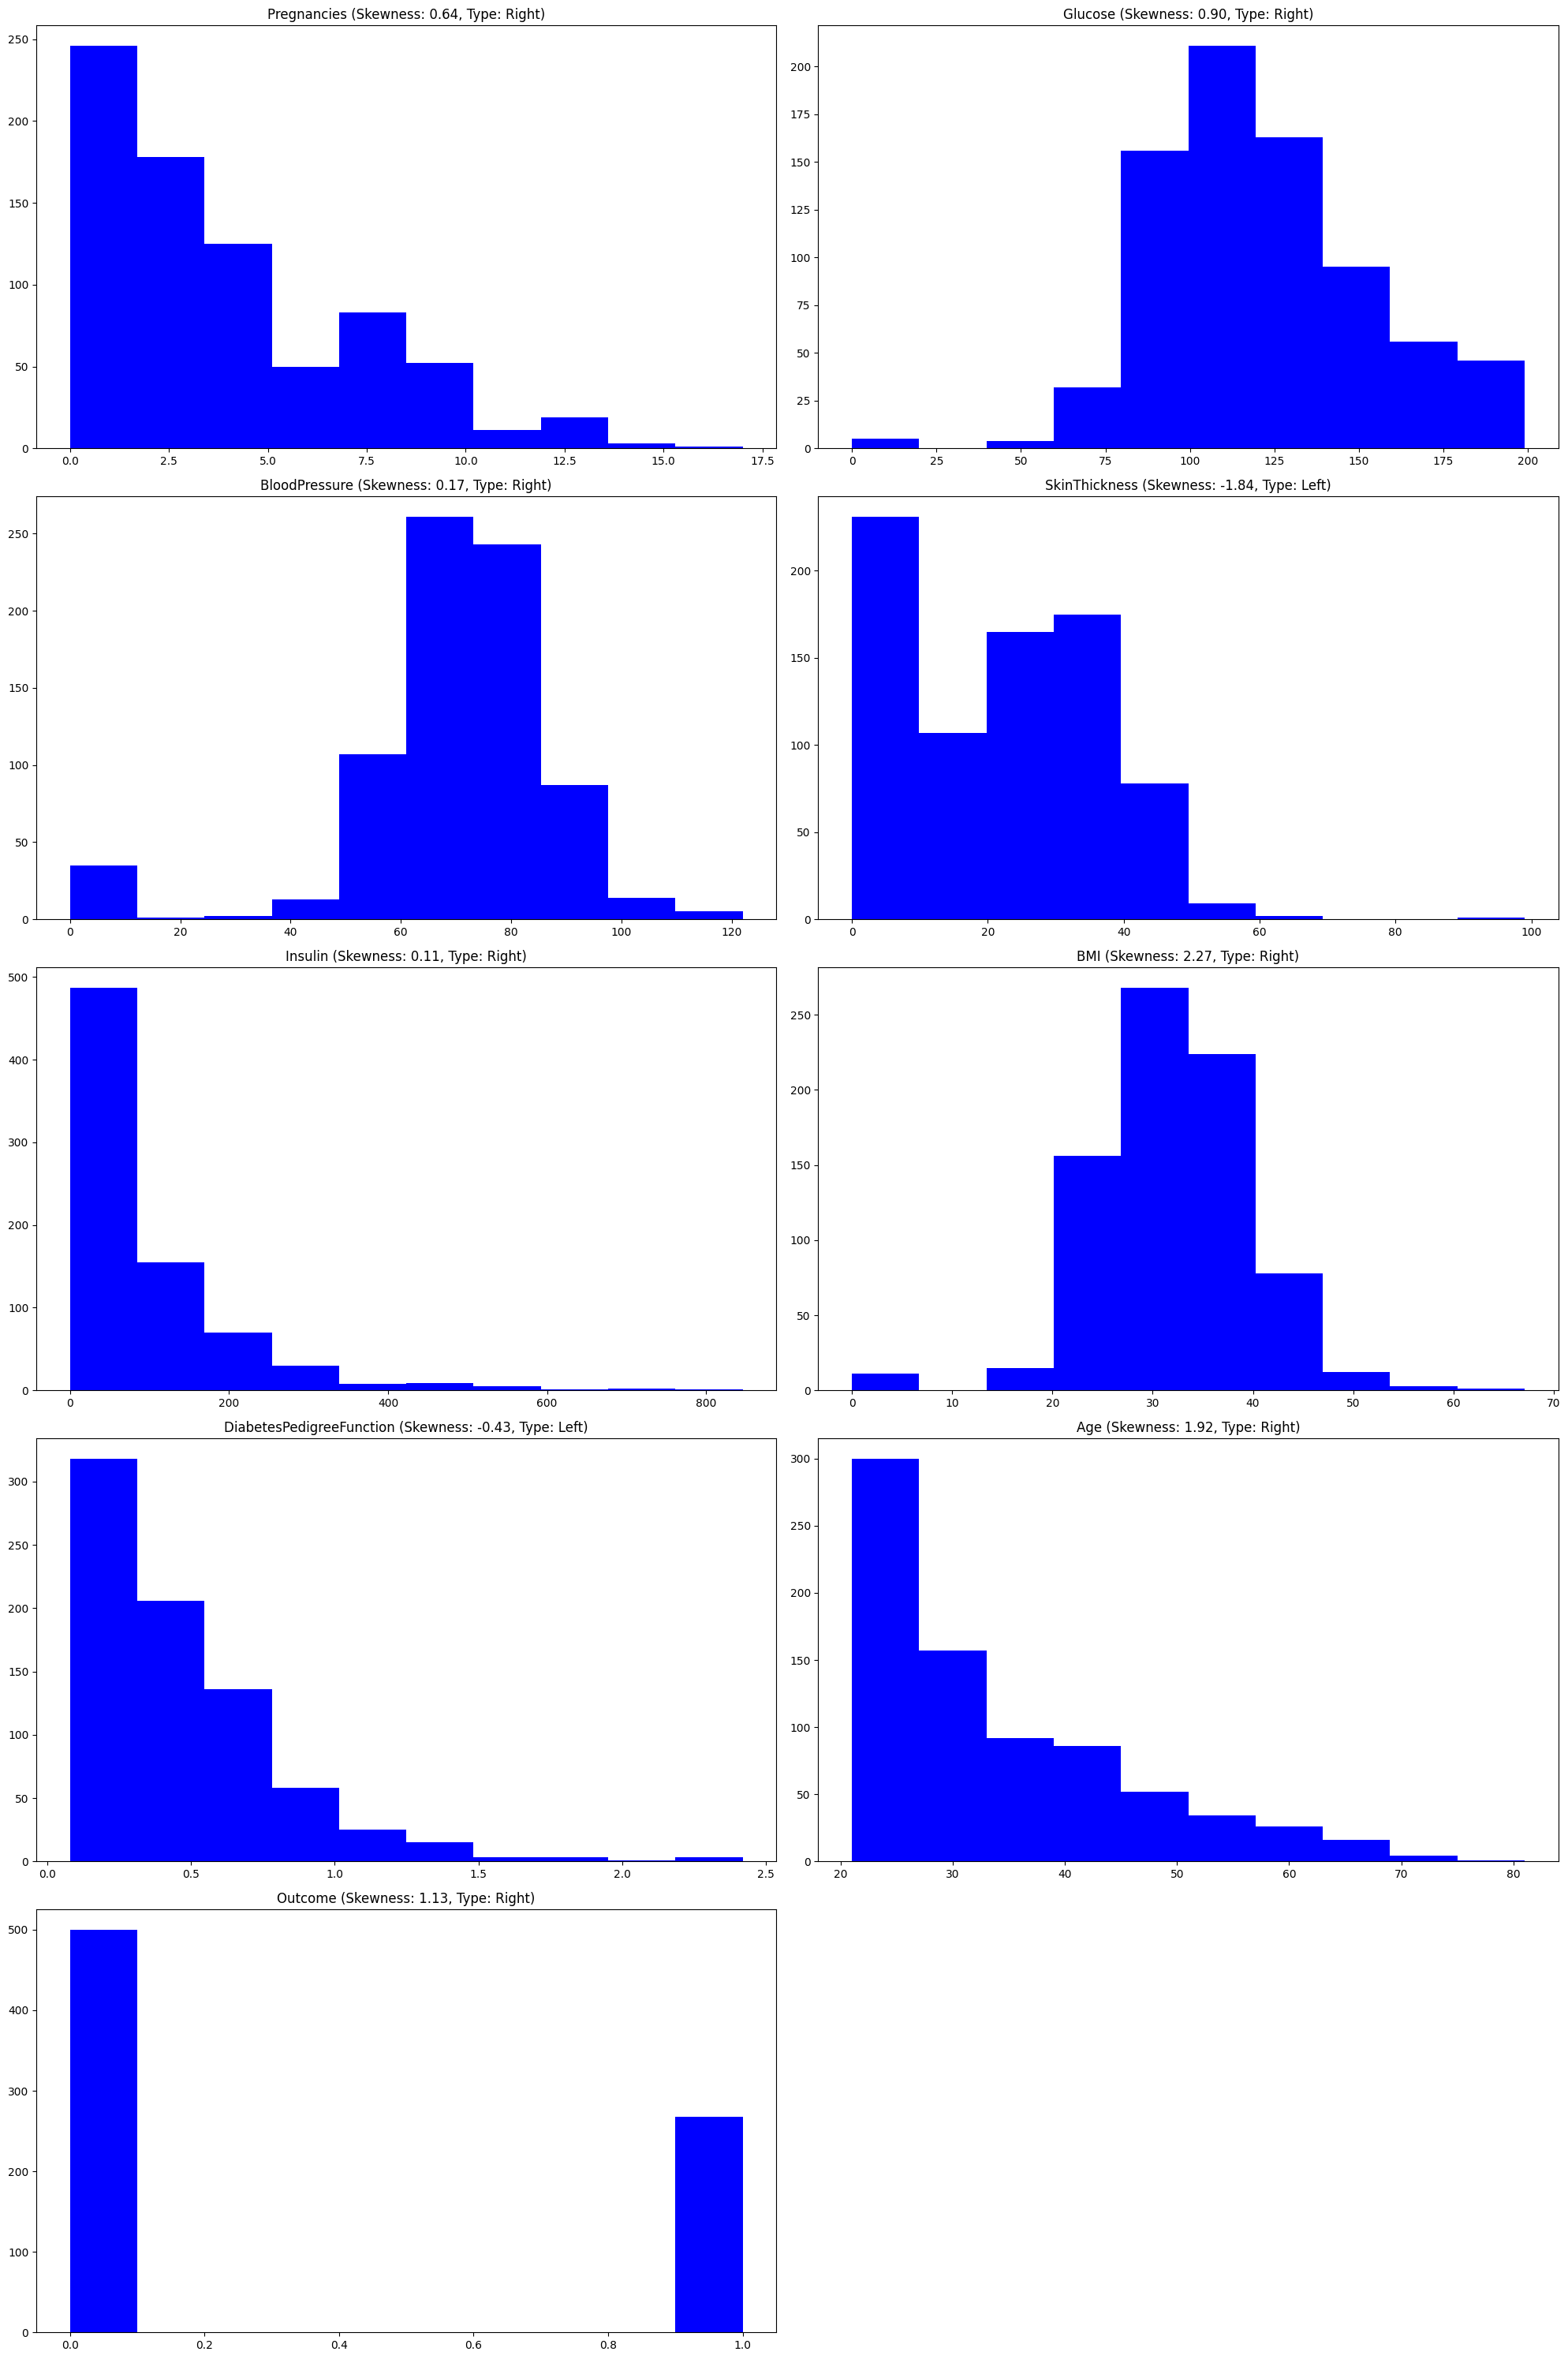

In [ ]:
import math

skew = new_df.skew()
n_rows = math.ceil(len(df.columns) / 2)
plt.figure(figsize=(20, 30))
gs = plt.GridSpec(n_rows, 2)


for i, skew in zip(df.columns.tolist(), skew):
    row = (df.columns.tolist().index(i)) // 2
    col = (df.columns.tolist().index(i)) % 2

    ax = plt.subplot(gs[row, col])
    ax.hist(df[i], color='blue')
    ax.set_title(f'{i} (Skewness: {skew:.2f}, Type: {"Left" if skew < 0 else "Right" if skew > 0 else "none"})')

plt.tight_layout()
plt.show()

**SECTION-B**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Split Train**

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:', accuracy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.7597402597402597


In [ ]:
print(f'Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Confusion Matrix:
 [[83 16]
 [21 34]]


**PNG Tree Generated**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

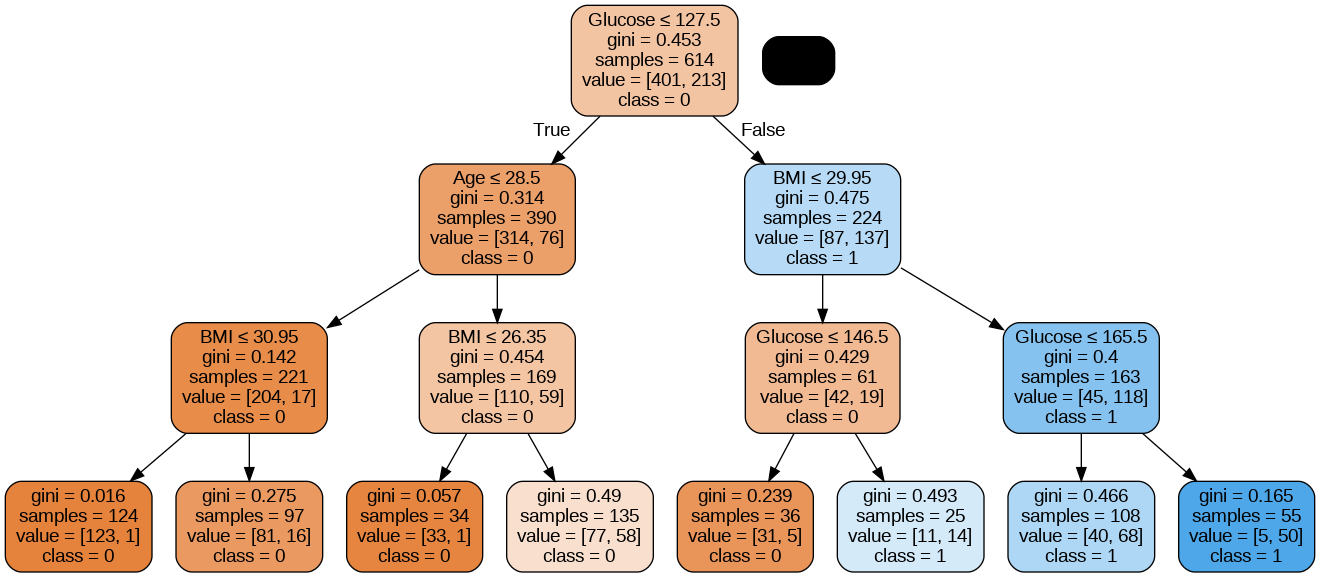

In [ ]:
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

The decision tree generated by the code visually shows how the classifier makes decisions based on the features in the dataset. The tree has a root node representing the entire dataset and subsequent nodes represent decisions based on different features.

The tree is divided into branches, representing possible outcomes of each decision, and the final nodes of the tree (called leaf nodes) represent the predicted class for a given set of feature values. In this case, the leaf nodes are labeled 0 or 1 to indicate whether the person is predicted to have diabetes or not.

The decision tree in the PNG image has a depth of 3, which means that it makes a maximum of 3 decisions before arriving at a prediction with the first decision based on glucose level, followed by BMI and age. If glucose level is over 127.5, BMI is over 26.8, and age is over 28.5, the prediction is 1 (diabetes), otherwise it is 0 (no diabetes).

**For 2nd model**

In [ ]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, random_state=42)

clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy (second model):", accuracy2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy (second model): 0.7727272727272727


**PNG tree for 2nd Model**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

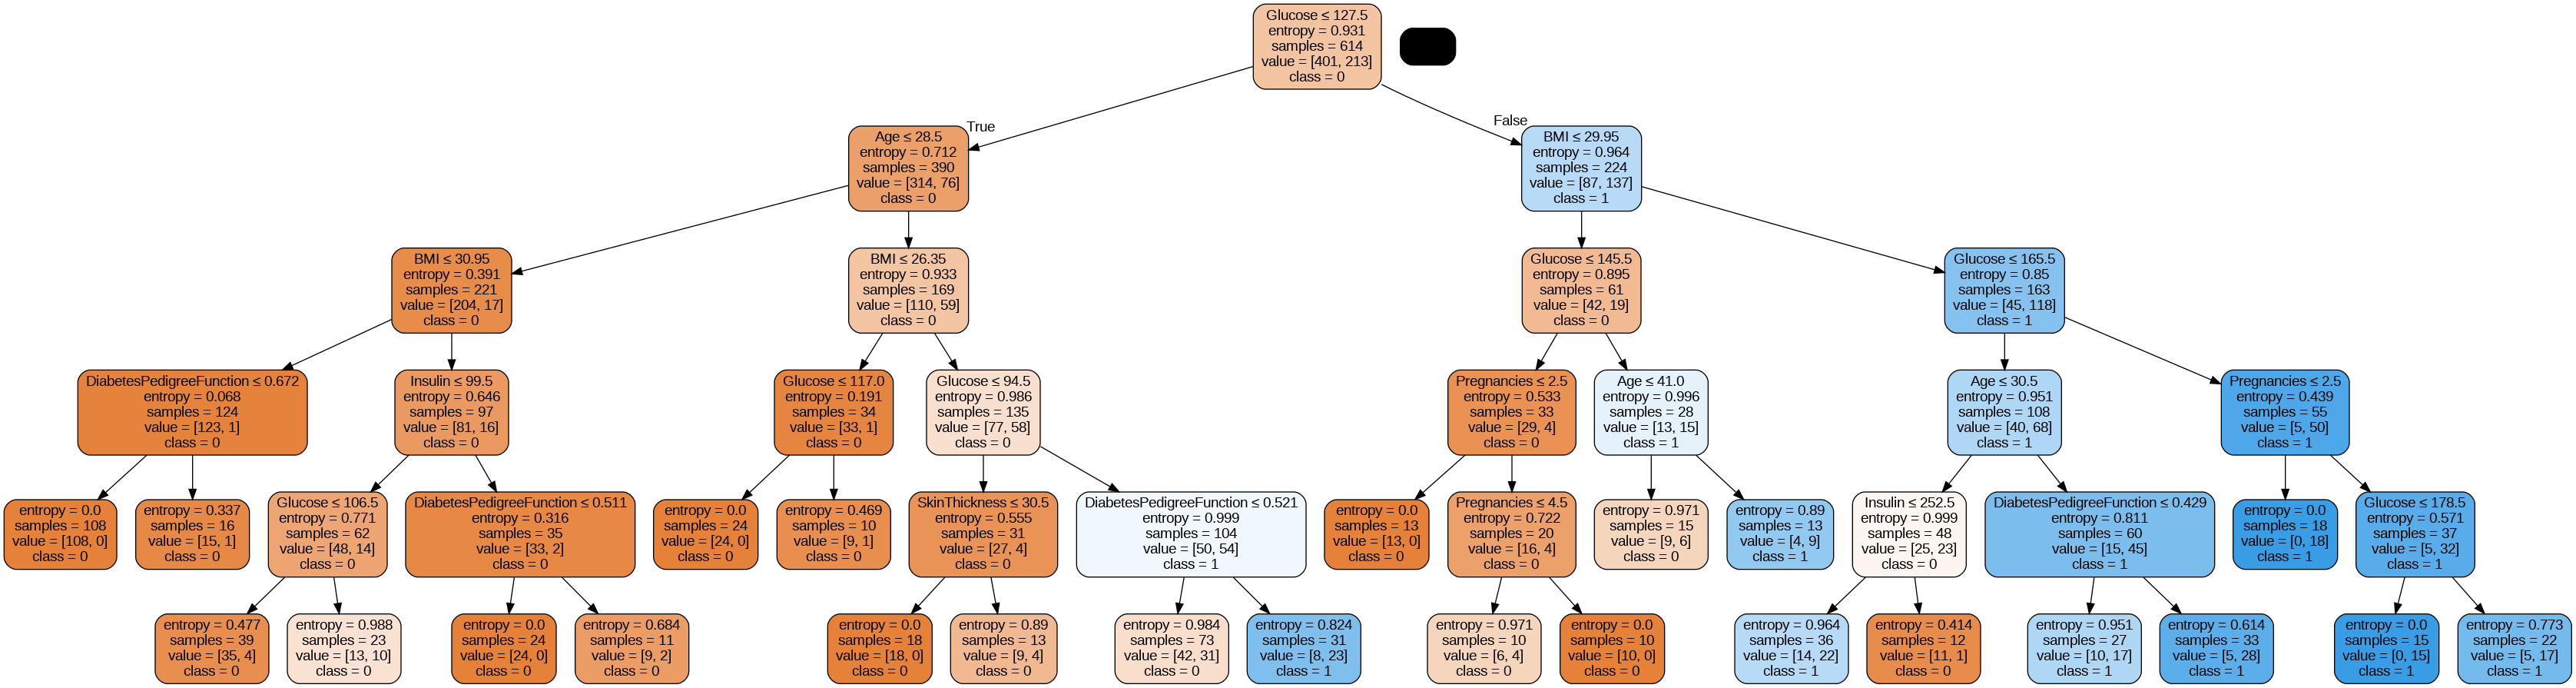

In [ ]:
dot_data2 = export_graphviz(clf2, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())